In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

cm = 1/2.54

plt.rcParams['figure.figsize'] = (4*cm,3*cm)


font = {'size' : 5}

plt.rc('font', **font)

plt.rc('axes', linewidth=1*cm)
sns.set()
sns.set_style("white")
sns.set_context("poster")

sns.set_palette('muted')

cm = 1/2.54
plt.rcParams['pdf.fonttype'] = 42

In [2]:
def readfile(fname):
    with open(fname, 'r') as f:
        return [line.rstrip() for line in f.readlines()]

In [3]:
samples = [f'control_{i}' for i in [1,2,3,4]] + [f'4032_{i}' for i in [1,2,3,4]] + [f'4030_{i}' for i in [1,2]]

In [4]:
offsets_csv = pd.read_csv('../topact-data/kidney-stereoseq/offsets.csv')

offsets = {}

for row in offsets_csv.itertuples():
    offsets[row.sample] = (row.xmin, row.ymin)

In [5]:
def pointdistance(x, y):
    a, b = x
    c, d = y
    return ((a-c)**2 + (b-d)**2)**0.5

In [6]:
def innbhd(x, y):
    a, b = x
    c, d = y
    return abs(a-c) <= 75 and abs(b-d) <= 75

In [7]:
def distance(x, ys):
    return min(pointdistance(x, y) for y in ys)

In [8]:
def inpod(x, ys):
    return any(innbhd(x, y) for y in ys)

In [11]:
pod_distances = []
assays = []
xs = []
ys = []
inpods = []

for sample in samples[4:]:
    print(sample)
    immunes = np.loadtxt(f'../topact-data/kidney-stereoseq/immune-coords/{sample}_immunes.txt').astype('int')
    offset_x, offset_y = offsets[sample]
    pods = np.loadtxt(f'../topact-data/kidney-stereoseq/pod-coords/{sample}_pods.txt').astype('int')
    
    for x,y in immunes:

            
            pod_distance = distance((x,y), pods)
            pod_distances.append(pod_distance)
            
            assays.append(sample)
            inpods.append(inpod((x,y), pods))
            xs.append(x)
            ys.append(y)

4032_1
4032_2
4032_3
4032_4
4030_1
4030_2


In [12]:
poddf = pd.DataFrame({'Sample': assays, 'x': xs, 'y': ys, 'Pod distance': pod_distances, 'Region': inpods})

poddf['Distance (um)'] = poddf['Pod distance'] * 0.715

In [13]:
poddf['Pod-adjacent'] = list(map(lambda x : 'Pod-adjacent' if x < 20 else 'Not adjacent', poddf['Distance (um)']))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


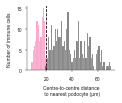

In [23]:
sns.set(style="ticks", context='paper', font="Arial")


sns.histplot(data=poddf[poddf['Region'] == True], x='Distance (um)', binwidth=1, hue='Pod-adjacent',
             palette={'Pod-adjacent': '#f84593', 'Not adjacent': 'black'})

plt.plot([20, 20], [0, 18], linestyle='--', linewidth=2*cm, color='black')

plt.ylabel('Number of immune cells', fontsize=5)
plt.xlabel('Centre-to-centre distance\n to nearest podocyte (μm)', fontsize=5)

plt.ylim([0,15.5])

sns.despine(top=True, right=True)
plt.tick_params(labelsize=5)
plt.legend().remove()

plt.xticks([20, 40, 60])
ax = plt.gca()
ax.spines['left'].set_linewidth(1*cm)
ax.spines['bottom'].set_linewidth(1*cm)

ax.yaxis.set_tick_params(width=1*cm, length=2)
ax.xaxis.set_tick_params(width=1*cm, length=2)

plt.savefig('./poddistances.pdf', bbox_inches='tight')


In [24]:
poddf.to_csv('poddistances.csv')

In [25]:
poddf

,Sample,x,y,Pod distance,Region,Distance (um),Pod-adjacent
0,4032_1,1202,789,51.009803,True,36.472009,Not adjacent
1,4032_1,1454,799,116.606175,False,83.373415,Not adjacent
2,4032_1,173,1024,234.439758,False,167.624427,Not adjacent
3,4032_1,1787,1110,147.166572,False,105.224099,Not adjacent
4,4032_1,1629,869,51.009803,True,36.472009,Not adjacent
...,...,...,...,...,...,...,...
1074,4030_2,2858,1808,128.378347,False,91.790518,Not adjacent
1075,4030_2,3243,716,52.201533,True,37.324096,Not adjacent
1076,4030_2,1688,284,52.153619,True,37.289838,Not adjacent
1077,4030_2,2054,1319,164.127999,False,117.351519,Not adjacent
